In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [4]:
data = pd.read_csv("../data/external/archive.zip")
data.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [5]:
data["Height"] *= 2.54
data

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,172.085,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,183.515,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,168.275,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,183.515,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,180.975,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,134.25,170.180,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,201.00,177.165,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,186.75,167.640,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,190.75,179.070,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


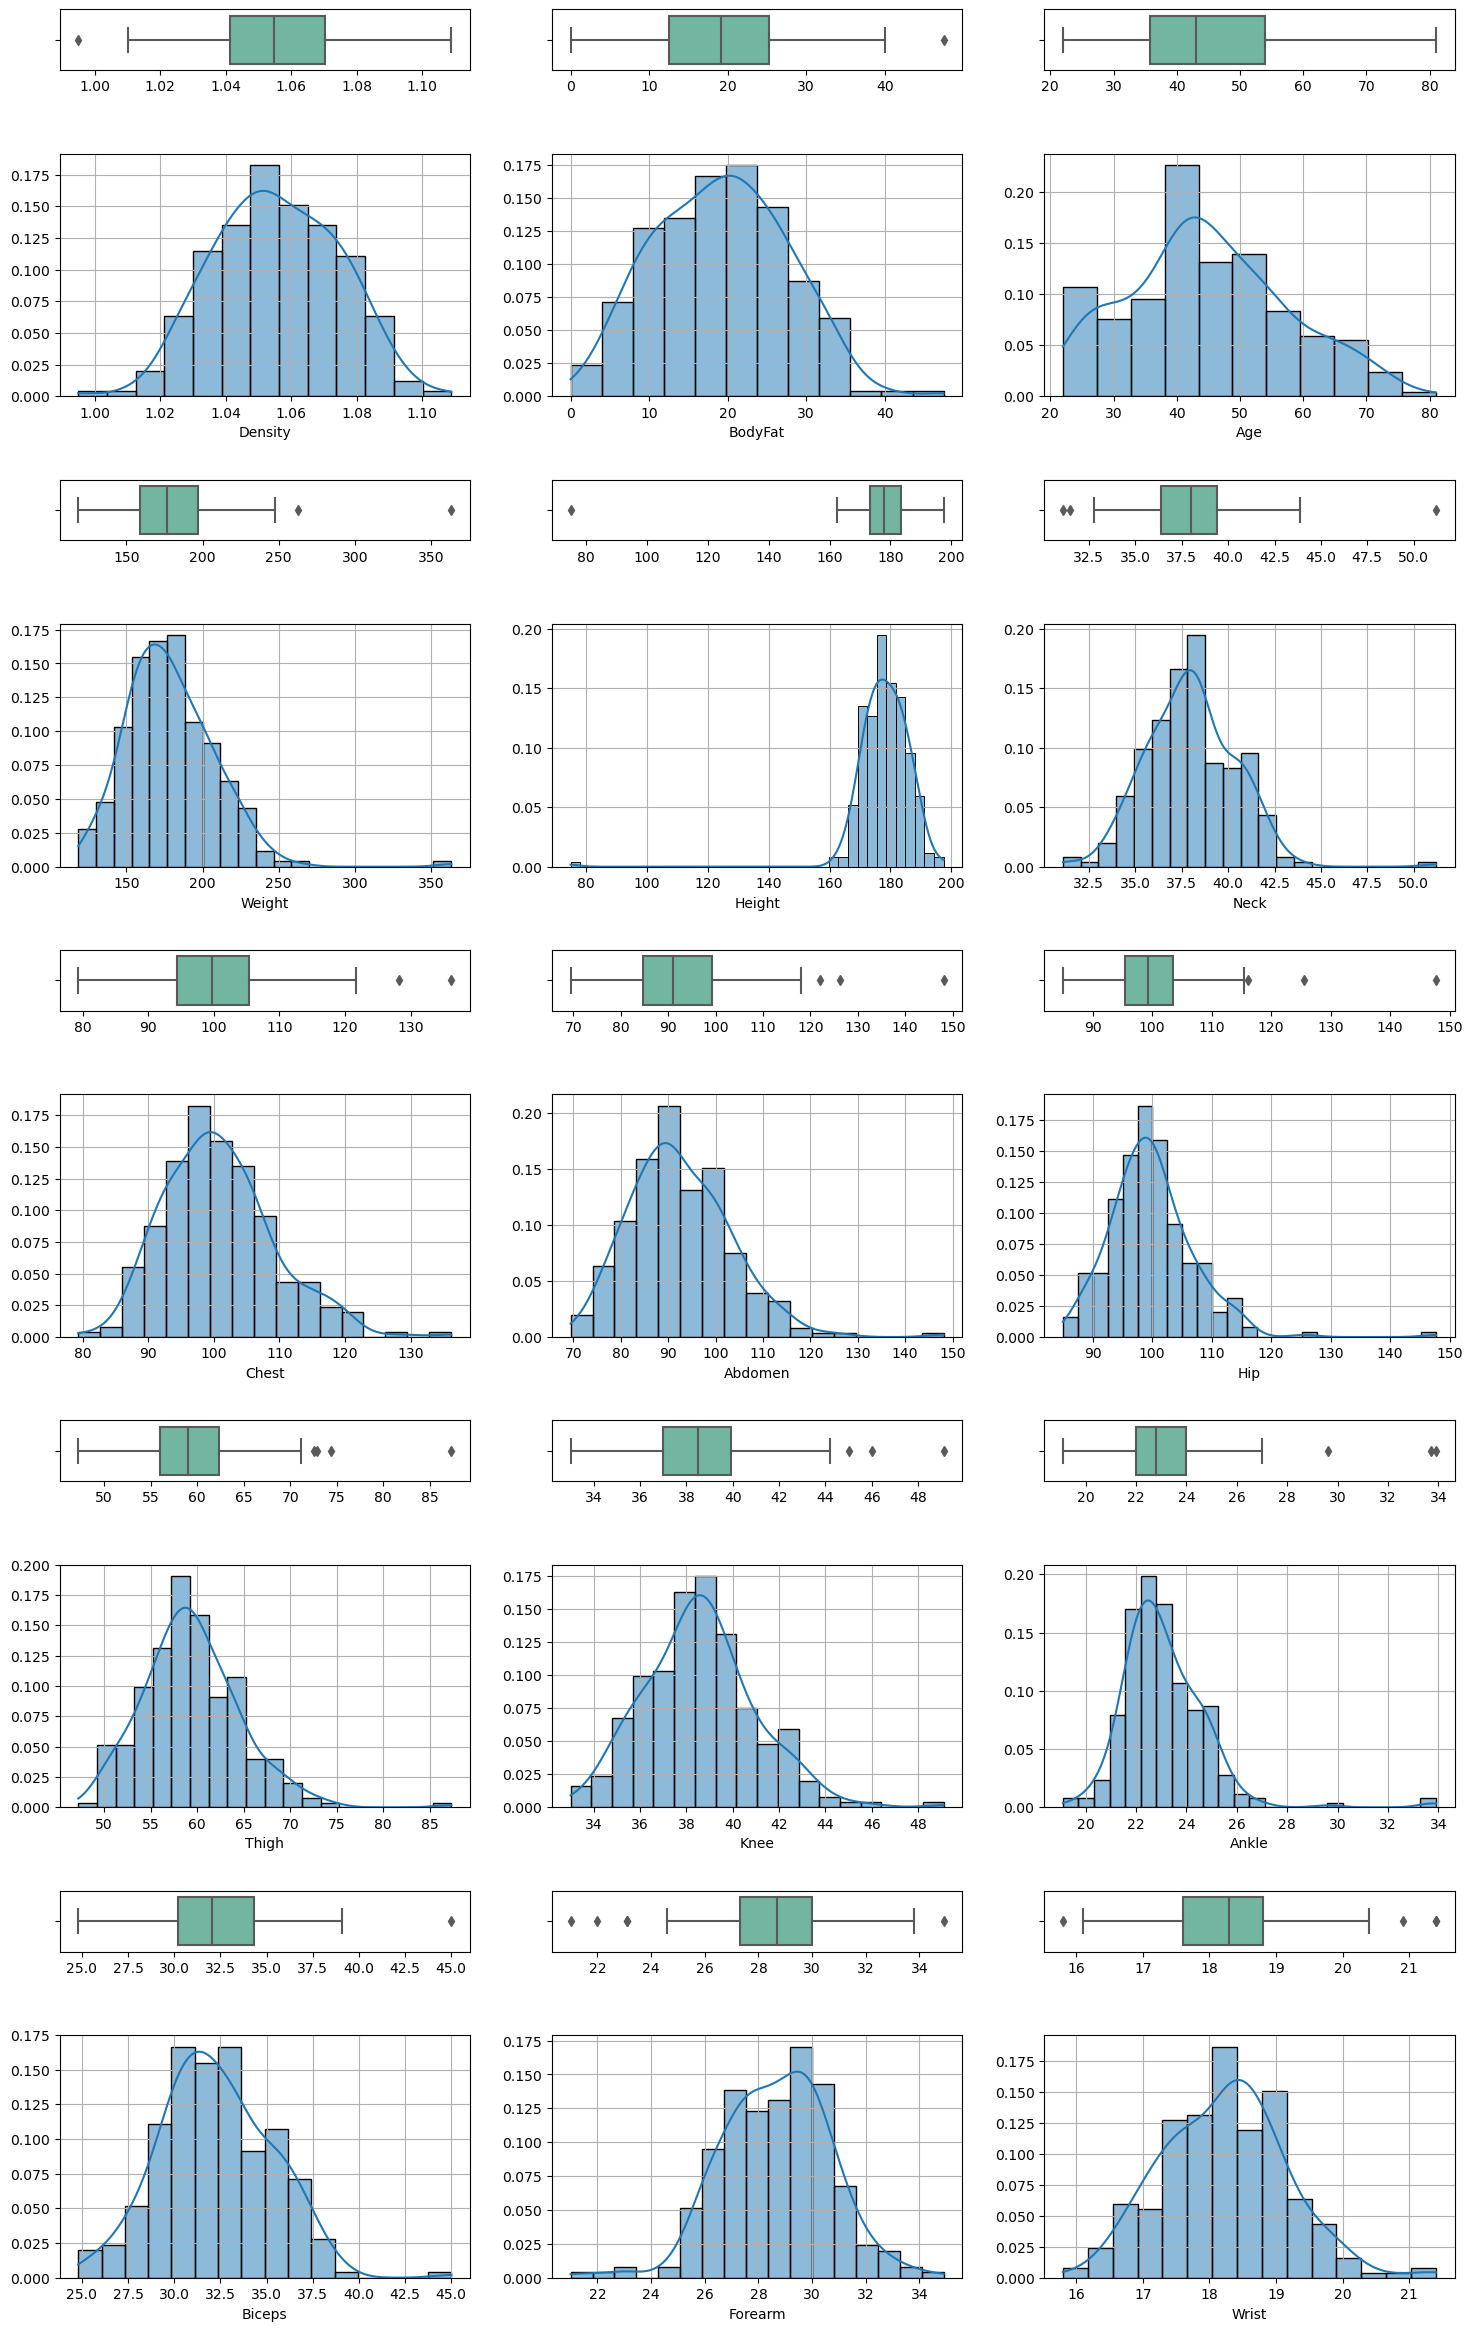

In [9]:
spec = mpl.gridspec.GridSpec(
    ncols=3, nrows=20, height_ratios=[1, 4] * 10, hspace=.55
)
fig = plt.figure(figsize=(18, 60))
for i in range(5):
    for j in range(3):
        ax = fig.add_subplot(spec[6 * i + j])
        sns.boxplot(
            data=data,
            x=data.columns[3 * i + j],
            palette="Set2",
            ax=ax
        ).set(xlabel=None)
        ax = fig.add_subplot(spec[3 + 6 * i + j])
        sns.histplot(
            x=data.columns[3 * i + j],
            kde=True,
            ax=ax,
            data=data,
            stat="probability",
            palette="Set2"
        ).set(ylabel=None)
        ax.grid(True)

plt.show()

In [10]:
y = data["BodyFat"]
X = data.drop(columns=["BodyFat"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.3, random_state=64)

model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)
test_data_rmse = mean_squared_error(y_test, y_pred, squared=False)
training_data_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
print(f"Контролирующая выборка = {test_data_rmse:.4f}")
print(f"Обучающая выборка = {training_data_rmse:.4f}")

Контролирующая выборка = 0.7466
Обучающая выборка = 1.4349


In [11]:
from sklearn.model_selection import cross_val_score, cross_val_predict

model = LinearRegression()

cv_scores = cross_val_score(
    model,
    X_train,
    y_train,
    cv=5,
    scoring="neg_root_mean_squared_error"
)
print("Результаты скользящего контроля:")
print("\n".join(f"RMSE = {s:.4f}" for s in cv_scores))
print(f"Среднее RMSE = {np.mean(-cv_scores):.4f}")

Результаты скользящего контроля:
RMSE = -0.9446
RMSE = -1.6895
RMSE = -2.9885
RMSE = -1.1170
RMSE = -1.2401
Среднее RMSE = 1.5960


In [13]:
from sklearn.model_selection import KFold

In [15]:
kf = KFold(n_splits=5)
for k, (train_index, test_index) in enumerate(kf.split(X_train)):
    X_train_folds = X_train.iloc[train_index]
    y_train_folds = y_train.iloc[train_index]
    model.fit(X_train_folds, y_train_folds)
    y_train_pred_fold = model.predict(X_train_folds)
    k1 = 1 + k
    print(f"Split {k1}:")
    print(
        f"Train RMSE = {mean_squared_error(y_train_folds, y_train_pred_fold, squared=False):.4f}"
    )
    X_test_fold = X_train.iloc[test_index]
    y_test_fold = y_train.iloc[test_index]
    y_test_pred_fold = model.predict(X_test_fold)
    print(
        f"Fold {k1} RMSE = {mean_squared_error(y_test_fold, y_test_pred_fold, squared=False):.4f}"
    )
    y_test_pred = model.predict(X_test)
    print(
        f"Test Data RMSE = {mean_squared_error(y_test, y_test_pred, squared=False):.4f}\n"
    )

print(f"Test Data RMSE = {test_data_rmse:.4f}")
print(f"Training Data RMSE = {training_data_rmse:.4f}")

Split 1:
Train RMSE = 1.5441
Fold 1 RMSE = 0.9446
Test Data RMSE = 0.8987

Split 2:
Train RMSE = 1.3863
Fold 2 RMSE = 1.6895
Test Data RMSE = 0.8855

Split 3:
Train RMSE = 0.8932
Fold 3 RMSE = 2.9885
Test Data RMSE = 0.3736

Split 4:
Train RMSE = 1.5209
Fold 4 RMSE = 1.1170
Test Data RMSE = 1.0271

Split 5:
Train RMSE = 1.5564
Fold 5 RMSE = 1.2401
Test Data RMSE = 0.9793

Test Data RMSE = 0.7466
Training Data RMSE = 1.4349


In [16]:
from sklearn.metrics import make_scorer


def se(y_true, y_pred):
    return np.sum((y_true - y_pred) ** 2)


se_scorer = make_scorer(se, greater_is_better=False)

In [17]:
from sklearn.metrics import make_scorer

cv_scores = cross_val_score(model, X, y, cv=5, scoring=se_scorer)

print(
    "Результаты скользящего контроля:\n\t",
    "\n\t".join(f"{s:.4f}" for s in cv_scores)
)
print(f"Среднее = {np.mean(-cv_scores):.4f}")

Результаты скользящего контроля:
	 -94.1272
	-328.9341
	-10.3153
	-30.1014
	-35.6136
Среднее = 99.8184
